In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "field",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 7719 files belonging to 184 classes.


In [4]:
class_name = dataset.class_names
class_name

['abies_concolor',
 'abies_nordmanniana',
 'acer_campestre',
 'acer_ginnala',
 'acer_griseum',
 'acer_negundo',
 'acer_palmatum',
 'acer_pensylvanicum',
 'acer_platanoides',
 'acer_pseudoplatanus',
 'acer_rubrum',
 'acer_saccharinum',
 'acer_saccharum',
 'aesculus_flava',
 'aesculus_glabra',
 'aesculus_hippocastamon',
 'aesculus_pavi',
 'ailanthus_altissima',
 'albizia_julibrissin',
 'amelanchier_arborea',
 'amelanchier_canadensis',
 'amelanchier_laevis',
 'asimina_triloba',
 'betula_alleghaniensis',
 'betula_jacqemontii',
 'betula_lenta',
 'betula_nigra',
 'betula_populifolia',
 'broussonettia_papyrifera',
 'carpinus_betulus',
 'carpinus_caroliniana',
 'carya_cordiformis',
 'carya_glabra',
 'carya_ovata',
 'carya_tomentosa',
 'castanea_dentata',
 'catalpa_bignonioides',
 'catalpa_speciosa',
 'cedrus_atlantica',
 'cedrus_deodara',
 'cedrus_libani',
 'celtis_occidentalis',
 'celtis_tenuifolia',
 'cercidiphyllum_japonicum',
 'cercis_canadensis',
 'chamaecyparis_pisifera',
 'chamaecyparis

In [5]:
len(dataset)

242

In [6]:
242*32

7744

In [5]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[139 165 102 105 134  87 130  88 170  30  58  76 137  22 167 130   7   6
 136 103 156  61 169 171  79  64  20 120  34 142  37 136]


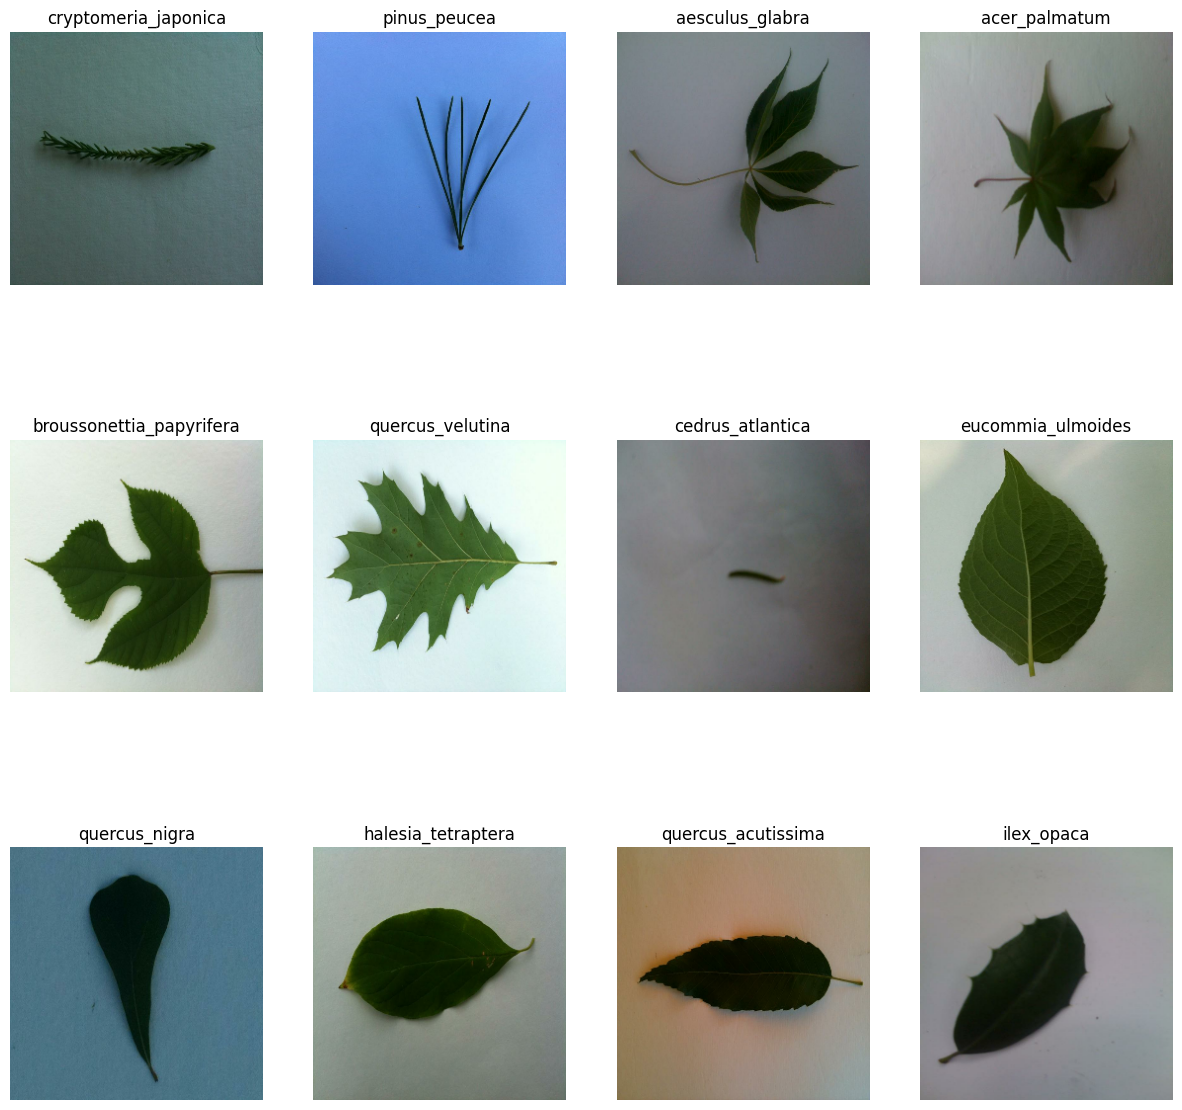

In [6]:
plt.figure(figsize=(15,15))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [9]:
train_size = 0.8
len(dataset)*train_size

193.60000000000002

In [ ]:
train_ds = dataset.take(193)
len(train_ds)

In [ ]:
test_ds = dataset.skip(193)
len(test_ds)

In [ ]:
val_size = 0.1
len(dataset)*val_size

In [ ]:
val_ds = test_ds.take(24)
len(val_ds)

In [ ]:
test_ds = test_ds.skip(24)
len(test_ds)

In [7]:
def get_dataset_partition(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [8]:
train_ds, val_ds, test_ds = get_dataset_partition(dataset)

In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [10]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [12]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [12]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 184

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [13]:
model.build(input_shape = input_shape)

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (32, 60, 60, 64)         

In [15]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [19]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
193/193 [==============================] - 305s 2s/step - loss: 4.9853 - accuracy: 0.0330 - val_loss: 4.3821 - val_accuracy: 0.0391
Epoch 2/50
193/193 [==============================] - 254s 1s/step - loss: 3.7995 - accuracy: 0.1247 - val_loss: 3.1423 - val_accuracy: 0.1927
Epoch 3/50
193/193 [==============================] - 249s 1s/step - loss: 3.0039 - accuracy: 0.2422 - val_loss: 2.6282 - val_accuracy: 0.2878
Epoch 4/50
193/193 [==============================] - 252s 1s/step - loss: 2.5625 - accuracy: 0.3237 - val_loss: 2.4393 - val_accuracy: 0.3451
Epoch 5/50
193/193 [==============================] - 242s 1s/step - loss: 2.2044 - accuracy: 0.3985 - val_loss: 2.0726 - val_accuracy: 0.4036
Epoch 6/50
193/193 [==============================] - 281s 1s/step - loss: 1.9290 - accuracy: 0.4613 - val_loss: 1.7437 - val_accuracy: 0.4883
Epoch 7/50
193/193 [==============================] - 328s 2s/step - loss: 1.6719 - accuracy: 0.5217 - val_loss: 1.6199 - val_accuracy: 0.5247

In [26]:
model.save("plant.h5")

In [24]:
import os
model_version=max([int(i) for i in os.listdir("./models") + [0]])+1
model.save(f"./models/{model_version}")

INFO:tensorflow:Assets written to: ./models/1\assets


INFO:tensorflow:Assets written to: ./models/1\assets


In [27]:
scores = model.evaluate(test_ds)

25/25 [==============================] - 28s 388ms/step - loss: 0.8951 - accuracy: 0.8338


In [16]:
from tensorflow.keras.models import load_model
savedModel=load_model('plant.h5')

In [28]:
scores


[0.8950783610343933, 0.8337500095367432]

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

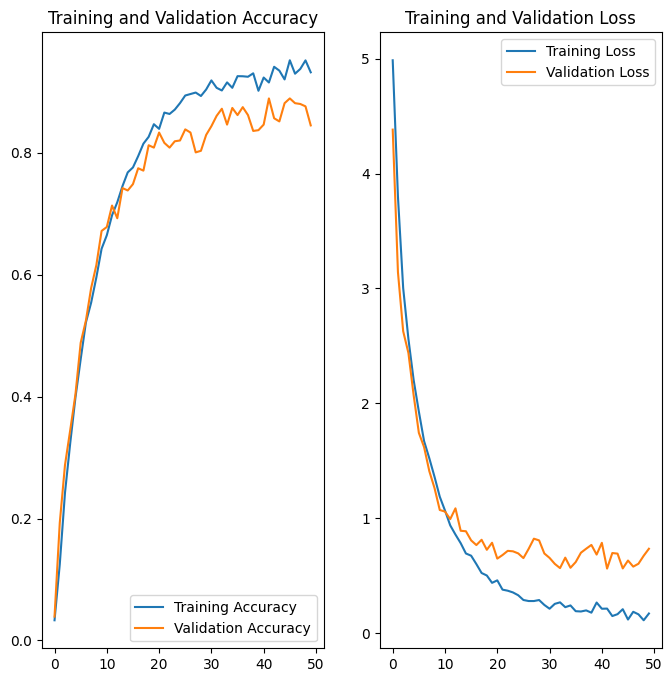

In [31]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: fraxinus_americana
1/1 [==============================] - 1s 582ms/step
predicted label: fraxinus_americana


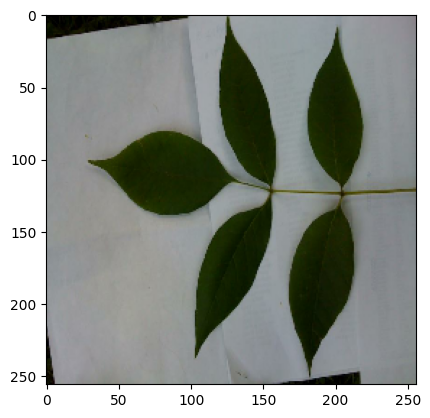

In [17]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])
    
    batch_prediction = savedModel.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [18]:
def predict(savedModel, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = savedModel.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 45ms/step


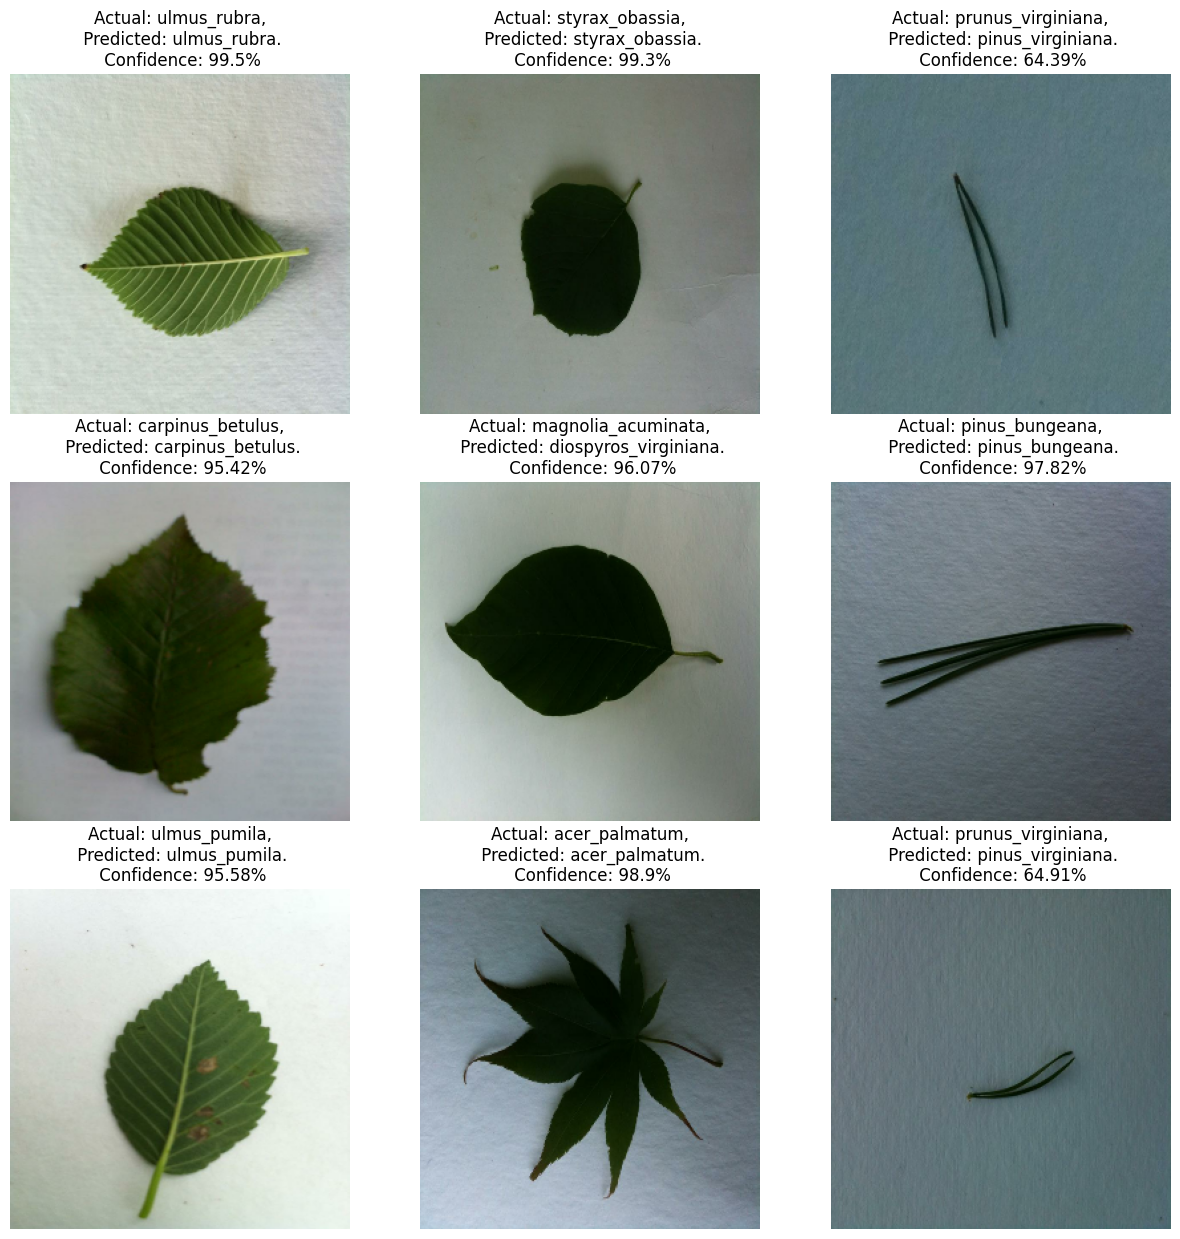

In [19]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(savedModel, images[i].numpy())
        actual_class = class_name[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")